# Project Title: Netflix movies and TV shows clustering

---



**Project Description**

This Dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows has recently tripled, while the number of movies has decreased by more than 2000 titles since 2010. It will be interesting to explore what all other insights can be obtained from the same Dataset.
Integrating this Dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
In this project, you are required to do

*   EDA
*   Understanding what type content is available in different countries

*   If Netflix is increasingly focusing on TV rather that movies in recent years
*   Clustering similar content by matching text-based features





**Dataset Description**



1.   Show_id- Unique ID for each movie or TV show 

1.   type- Identifier-A movie or a TV show

1.   title- Title of the movie or TV show

1.   director- Director of the show

1.   cast- Actors involved
2.   Country- Country of production


7.  date_added- Date it was added on Netflix


8.   release_year- Actual release year of the show


9.   rating- TV rating of the show


10.   duration- Total duration in minutes or number of seasons

11.   listed_in- Genre
2.   description- The summary description





In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Mounting Drive and loading the Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


**Understanding the Data**

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
#Manipulating display output
pd.set_option('display.max_rows',10) #here displaying max rows 10
pd.set_option('display.max_columns', 100) #here displaying max columns 100

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.shape

(7787, 12)

In [ ]:
df.size

93444

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
#locating null values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
                ... 
release_year       0
rating             7
duration           0
listed_in          0
description        0
Length: 12, dtype: int64

In [ ]:
#replacing null values with "Unknown"
df['director'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added','rating'],inplace= True)#Dropping null values from 'rating' and 'date_added'

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
                 ...  
release_year     int64
rating          object
duration        object
listed_in       object
description     object
Length: 12, dtype: object

# Exploratory Data Analytics(EDA)

**Type**

In [ ]:
#Counting number of Movies and TV Shows
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

Text(0.5, 1.0, 'Count of movies and TV shows')

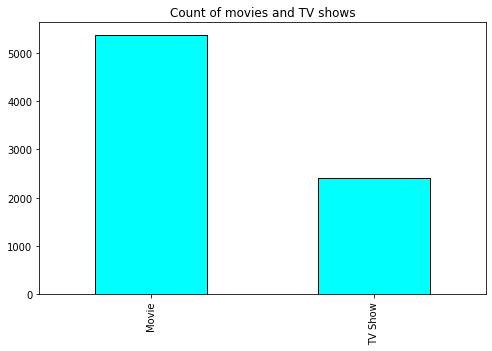

In [ ]:
#Plotting movies and TV shows on a barplot
plt.figure(figsize=(8,5))
df['type'].value_counts().plot.bar(color='cyan', edgecolor='black')
plt.title('Count of movies and TV shows')


Text(0.5, 1.0, 'Distribution of Type')

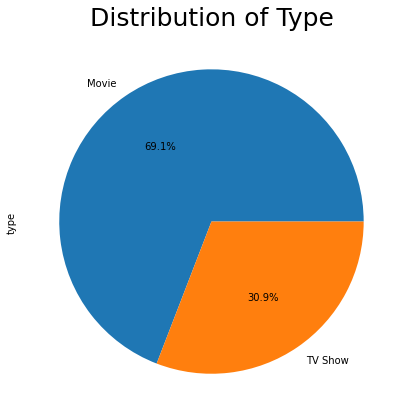

In [ ]:
#Plotting the percentage of Movies and TV shows in a pieplot
plt.figure(figsize=(7,7))
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Count of movies and TV shows')
plt.title('Distribution of Type', fontsize = 25)

**Rating**

In [ ]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating')

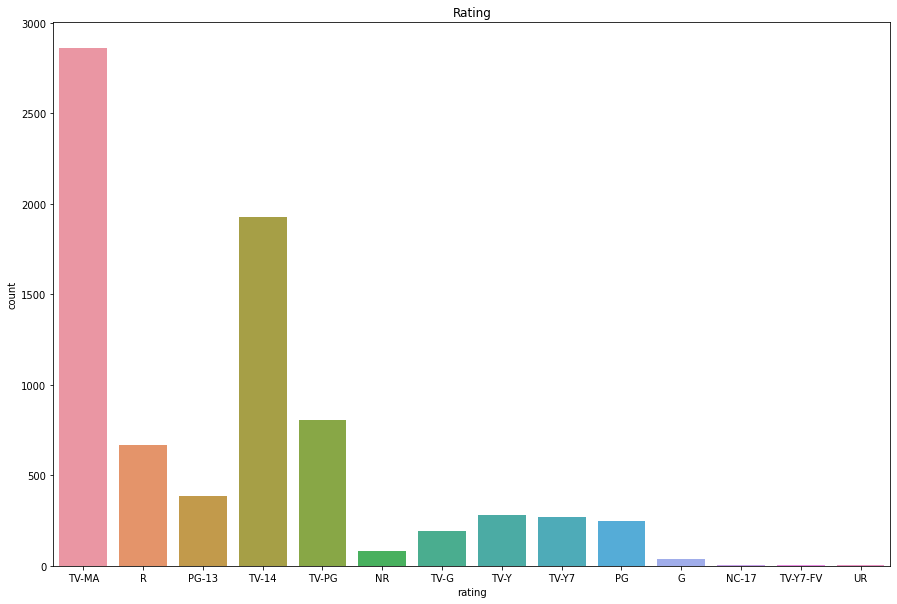

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='rating', data=df)
plt.title('Rating')

Text(0.5, 1.0, 'Relation between Type and Rating')

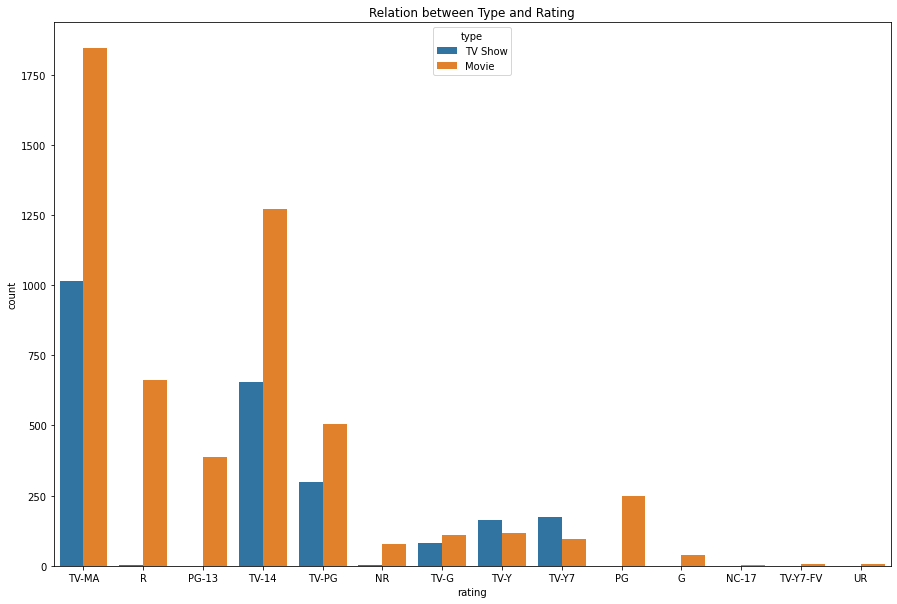

In [ ]:
#countplot depicting TV shows and Movies in each Rating category
plt.figure(figsize=(15,10))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')

**Date added**

In [ ]:
df['year_added']= pd.DatetimeIndex(df['date_added']).year #creating new column mentioning year at which show was added

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020


In [ ]:
df[df['type']== 'Movie'].year_added.value_counts().sort_index() #Counting number of movies added each year

2008       1
2009       2
2010       1
2011      13
2012       3
        ... 
2017     861
2018    1255
2019    1497
2020    1312
2021      88
Name: year_added, Length: 14, dtype: int64

Text(0, 0.5, 'count')

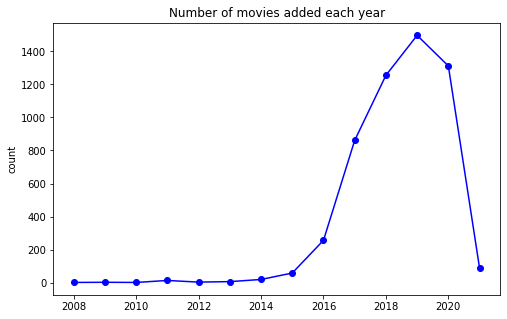

In [ ]:
#Lineplot depicting number of movies added each year
plt.figure(figsize=(8,5))
df[df['type']== 'Movie'].year_added.value_counts().sort_index().plot.line(color='blue',marker='o')
plt.title('Number of movies added each year')
plt.ylabel('count')

In [ ]:
df[df['type']== 'TV Show'].year_added.value_counts().sort_index()#Counting number of TV Shows added each year

2008      1
2013      5
2014      6
2015     30
2016    184
2017    361
2018    429
2019    656
2020    697
2021     29
Name: year_added, dtype: int64

Text(0, 0.5, 'count')

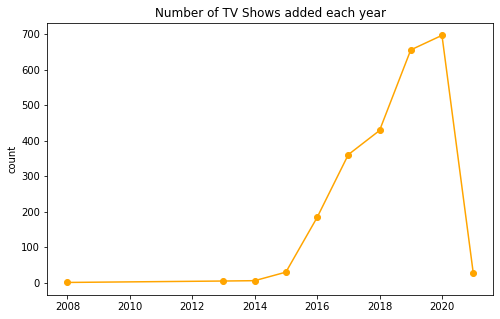

In [ ]:
#Lineplot depicting number of TV Shows added each year
plt.figure(figsize=(8,5))
df[df['type']== 'TV Show'].year_added.value_counts().sort_index().plot.line(color='orange',marker='o')
plt.title('Number of TV Shows added each year')
plt.ylabel('count')

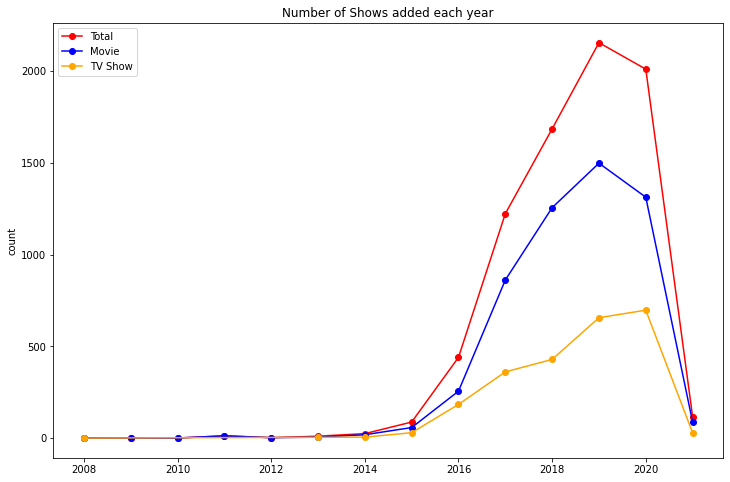

In [ ]:
#Lineplot depicting number of both Movies and TV Shows added each year
plt.figure(figsize=(12,8))
df.year_added.value_counts().sort_index().plot.line(color='red',marker='o')
df[df['type']== 'Movie'].year_added.value_counts().sort_index().plot.line(color='blue',marker='o')
df[df['type']== 'TV Show'].year_added.value_counts().sort_index().plot.line(color='orange',marker='o')
plt.title('Number of Shows added each year')
plt.ylabel('count')
plt.legend(['Total','Movie','TV Show'])

**Country**

In [ ]:
#creating a dataframe of countries 
country = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True); 
country = country[country != 'Unknown'] #Removing unknowns
country


title
3%                                                 Brazil
7:19                                               Mexico
23:59                                           Singapore
9                                           United States
21                                          United States
                                                ...      
Zubaan                                              India
Zumbo's Just Desserts                           Australia
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    United Kingdom
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Canada
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     United States
Length: 9048, dtype: object

In [ ]:
#Top 10 countries with most Netflix content available
country.value_counts().head(10)

United States     3287
India              990
United Kingdom     721
Canada             412
France             349
Japan              285
Spain              215
South Korea        212
Germany            199
Mexico             154
dtype: int64

Text(0.5, 1.0, 'Top 10 countries in Netflix')

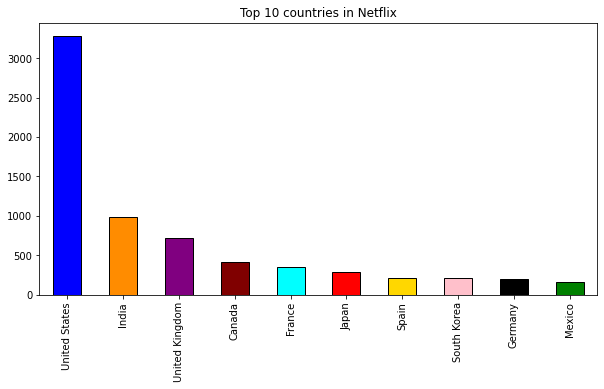

In [ ]:
#Visualising top 10 countries 
plt.figure(figsize=(10,5))
country.value_counts().head(10).plot.bar(color=('blue','darkorange','purple','maroon','cyan','red','gold','pink','black','green'), edgecolor='black')
plt.title('Top 10 countries in Netflix')


In [ ]:
#creating a dataframe of Genres each show is listed in.
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres.value_counts().sort_index()#finding out top 10 genres 

Action & Adventure          721
Anime Features               57
Anime Series                146
British TV Shows            231
Children & Family Movies    532
                           ... 
TV Sci-Fi & Fantasy          75
TV Shows                     12
TV Thrillers                 50
Teen TV Shows                60
Thrillers                   491
Length: 42, dtype: int64

Text(0.5, 1.0, 'Top 10 genres in Netflix ')

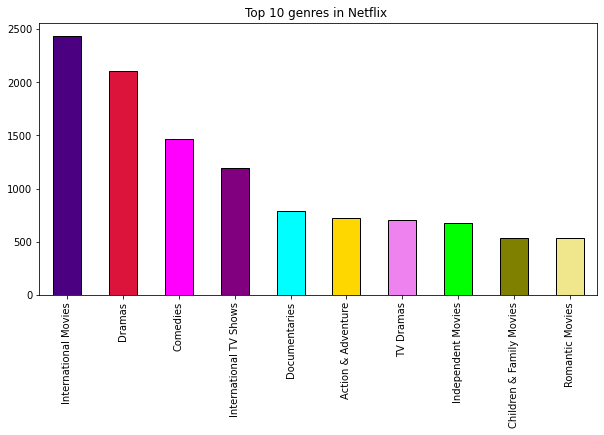

In [ ]:
#visualising top 10 genres.
plt.figure(figsize=(10,5))
genres.value_counts().head(10).plot.bar(color=('indigo','crimson','magenta','purple','aqua','gold','violet','lime','olive','khaki'), edgecolor= 'black')
plt.title("Top 10 genres in Netflix ")

In [ ]:
#creating a dataframe of Directors
directors = df[df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
directors

title
7:19                                       Jorge Michel Grau
23:59                                           Gilbert Chan
9                                                Shane Acker
21                                            Robert Luketic
46                                               Serdar Akar
                                                 ...        
Zoo                                             Shlok Sharma
Zoom                                            Peter Hewitt
Zozo                                             Josef Fares
Zubaan                                           Mozez Singh
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Sam Dunn
Length: 6111, dtype: object

In [ ]:
#Obtaining top 10 directors
directors.value_counts().head(10)

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Jay Chapman            12
Martin Scorsese        12
Steven Spielberg       10
Shannon Hartman         9
dtype: int64

Text(0.5, 1.0, 'Top 10 Directors on Netflix')

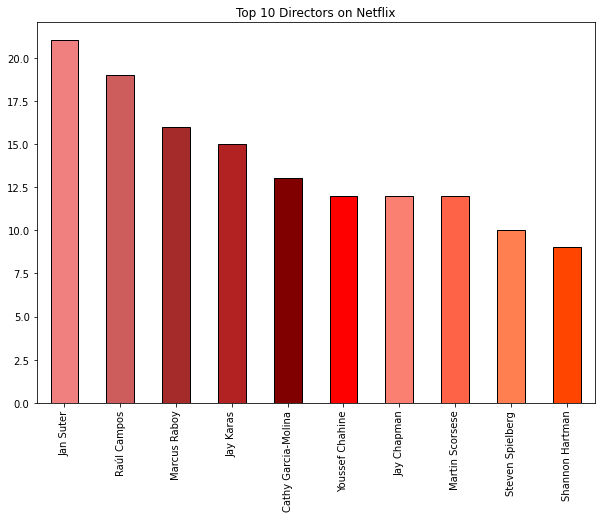

In [ ]:
#visualising top 10 directors
plt.figure(figsize=(10,7))
directors.value_counts().head(10).plot.bar(color=('lightcoral','indianred','brown','firebrick','maroon','red','salmon','tomato','coral','orangered'),edgecolor= 'black')
plt.title('Top 10 Directors on Netflix')

In [ ]:
#creating a dataframe of Actors
actor = df[df.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
actor

title
3%                                 João Miguel
3%                            Bianca Comparato
3%                                Michel Gomes
3%                             Rodolfo Valente
3%                             Vaneza Oliveira
                                 ...          
Zubaan                          Anita Shabdish
Zubaan                   Chittaranjan Tripathy
Zulu Man in Japan                      Nasty C
Zumbo's Just Desserts            Adriano Zumbo
Zumbo's Just Desserts              Rachel Khoo
Length: 55845, dtype: object

In [ ]:
#Obtaining top 10 actors
actor.value_counts().head(10)

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
Akshay Kumar        29
Boman Irani         27
Paresh Rawal        27
Amitabh Bachchan    27
Yuki Kaji           27
dtype: int64

Text(0.5, 1.0, 'Top 10 Actors on Netflix')

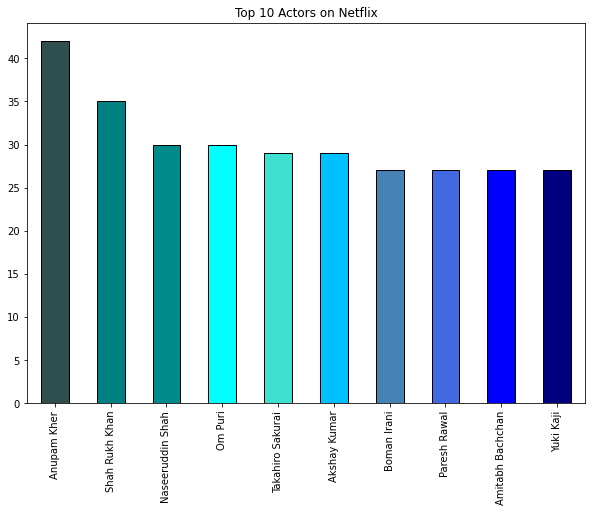

In [ ]:
#visualising top 10 actors
plt.figure(figsize=(10,7))
actor.value_counts().head(10).plot.bar(color=('darkslategrey','teal','darkcyan','aqua','turquoise','deepskyblue','steelblue','royalblue','blue','navy'),edgecolor= 'black')
plt.title('Top 10 Actors on Netflix')

# Feature Engineering

**One-hot Encoding**

In [ ]:
OHE= pd.get_dummies(df['type'])
df_new= df.merge(OHE, left_index= True, right_index= True)
df_new


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Movie,TV Show
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,0,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,1,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,1,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,1,0
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,1,0
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,0,1


In [ ]:
#dropping unknowns
i = df_new[((df_new.director == 'Unknown'))].index
df_new= df_new.drop(i)

In [ ]:
#creating a list of top 10 directors
dir_10= list(directors.value_counts().head(10).index)
dir_10

['Jan Suter',
 'Raúl Campos',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Youssef Chahine',
 'Jay Chapman',
 'Martin Scorsese',
 'Steven Spielberg',
 'Shannon Hartman']

In [ ]:
#creating a list of top 20 directors
dir_20= list(directors.value_counts().head(20).index)
dir_20

['Jan Suter',
 'Raúl Campos',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Youssef Chahine',
 'Jay Chapman',
 'Martin Scorsese',
 'Steven Spielberg',
 'Shannon Hartman',
 'Anurag Kashyap',
 'David Dhawan',
 'Umesh Mehra',
 'Yılmaz Erdoğan',
 'Lance Bangs',
 'Hakan Algül',
 'Justin G. Dyck',
 'Ryan Polito',
 'Kunle Afolayan',
 'Quentin Tarantino']

In [ ]:
#creating a list of top 50 directors
dir_50= list(directors.value_counts().head(50).index)
dir_50

['Jan Suter',
 'Raúl Campos',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Youssef Chahine',
 'Jay Chapman',
 'Martin Scorsese',
 'Steven Spielberg',
 'Shannon Hartman',
 'Anurag Kashyap',
 'David Dhawan',
 'Umesh Mehra',
 'Yılmaz Erdoğan',
 'Lance Bangs',
 'Hakan Algül',
 'Justin G. Dyck',
 'Ryan Polito',
 'Kunle Afolayan',
 'Quentin Tarantino',
 'Robert Rodriguez',
 'Johnnie To',
 'Leslie Small',
 'Don Michael Paul',
 'Ozan Açıktan',
 'Fernando Ayllón',
 'S.S. Rajamouli',
 'Hanung Bramantyo',
 'McG',
 'Noah Baumbach',
 'Dibakar Banerjee',
 'Omoni Oboli',
 'Karan Johar',
 'Riri Riza',
 'Sooraj R. Barjatya',
 'Kevin Smith',
 'Michael Simon',
 'Ron Howard',
 'Zoya Akhtar',
 'Priyadarshan',
 'Sameh Abdulaziz',
 'William Lau',
 'Rocky Soraya',
 'Joey So',
 'Robert Vince',
 'Imtiaz Ali',
 'Wenn V. Deramas',
 'Anees Bazmee',
 'Matt Askem',
 'Ashutosh Gowariker']

In [ ]:
#creating a list of top 100 directors
dir_100=list(directors.value_counts().head(100).index)
dir_100

['Jan Suter',
 'Raúl Campos',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Youssef Chahine',
 'Jay Chapman',
 'Martin Scorsese',
 'Steven Spielberg',
 'Shannon Hartman',
 'Anurag Kashyap',
 'David Dhawan',
 'Umesh Mehra',
 'Yılmaz Erdoğan',
 'Lance Bangs',
 'Hakan Algül',
 'Justin G. Dyck',
 'Ryan Polito',
 'Kunle Afolayan',
 'Quentin Tarantino',
 'Robert Rodriguez',
 'Johnnie To',
 'Leslie Small',
 'Don Michael Paul',
 'Ozan Açıktan',
 'Fernando Ayllón',
 'S.S. Rajamouli',
 'Hanung Bramantyo',
 'McG',
 'Noah Baumbach',
 'Dibakar Banerjee',
 'Omoni Oboli',
 'Karan Johar',
 'Riri Riza',
 'Sooraj R. Barjatya',
 'Kevin Smith',
 'Michael Simon',
 'Ron Howard',
 'Zoya Akhtar',
 'Priyadarshan',
 'Sameh Abdulaziz',
 'William Lau',
 'Rocky Soraya',
 'Joey So',
 'Robert Vince',
 'Imtiaz Ali',
 'Wenn V. Deramas',
 'Anees Bazmee',
 'Matt Askem',
 'Ashutosh Gowariker',
 'Rajkumar Santoshi',
 'Wong Jing',
 'Steven Soderbergh',
 'Tilak Shetty',
 'Ram Gopal Varma',
 'Jesse V. Johnson',
 '

In [ ]:
df_new['is_in_top_10_director']= df_new['director'].apply(lambda x: 1 if x in dir_10 else 0) #whether the show is directed by a director in the top 10 list
df_new['is_in_top_20_director']= df_new['director'].apply(lambda x: 1 if x in dir_20 else 0)#whether the show is directed by a director in the top 20 list
df_new['is_in_top_50_director']= df_new['director'].apply(lambda x: 1 if x in dir_50 else 0)#whether the show is directed by a director in the top 50 list
df_new['is_in_top_100_director']= df_new['director'].apply(lambda x: 1 if x in dir_100 else 0)#whether the show is directed by a director in the top 100 list
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Movie,TV Show,is_in_top_10_director,is_in_top_20_director,is_in_top_50_director,is_in_top_100_director
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,1,0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,0,0,0,0,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,1,0,0,0,0,0
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,0,0,0,0,0
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,1,0,0,0,0,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,1,0,0,0,0,0


In [ ]:
#creating a list of top 10 actors
Actor_10=list(actor.value_counts().head(10).index)
Actor_10

['Anupam Kher',
 'Shah Rukh Khan',
 'Naseeruddin Shah',
 'Om Puri',
 'Takahiro Sakurai',
 'Akshay Kumar',
 'Boman Irani',
 'Paresh Rawal',
 'Amitabh Bachchan',
 'Yuki Kaji']

In [ ]:
#creating a list of top 20 actors
Actor_20=list(actor.value_counts().head(20).index)
Actor_20

['Anupam Kher',
 'Shah Rukh Khan',
 'Naseeruddin Shah',
 'Om Puri',
 'Takahiro Sakurai',
 'Akshay Kumar',
 'Boman Irani',
 'Paresh Rawal',
 'Amitabh Bachchan',
 'Yuki Kaji',
 'Kareena Kapoor',
 'Vincent Tong',
 'John Cleese',
 'Andrea Libman',
 'Ashleigh Ball',
 'Tara Strong',
 'Ajay Devgn',
 'Nawazuddin Siddiqui',
 'Daisuke Ono',
 'Salman Khan']

In [ ]:
#creating a list of top 50 actors
Actor_50=list(actor.value_counts().head(50).index)
Actor_50

['Anupam Kher',
 'Shah Rukh Khan',
 'Naseeruddin Shah',
 'Om Puri',
 'Takahiro Sakurai',
 'Akshay Kumar',
 'Boman Irani',
 'Paresh Rawal',
 'Amitabh Bachchan',
 'Yuki Kaji',
 'Kareena Kapoor',
 'Vincent Tong',
 'John Cleese',
 'Andrea Libman',
 'Ashleigh Ball',
 'Tara Strong',
 'Ajay Devgn',
 'Nawazuddin Siddiqui',
 'Daisuke Ono',
 'Salman Khan',
 'Kay Kay Menon',
 'Nicolas Cage',
 'Samuel L. Jackson',
 'Adam Sandler',
 'Gulshan Grover',
 'Fred Tatasciore',
 'Yashpal Sharma',
 'Debi Derryberry',
 'James Franco',
 'Erin Fitzgerald',
 'Kana Hanazawa',
 'Anil Kapoor',
 'David Attenborough',
 'Junichi Suwabe',
 'Fred Armisen',
 'Saif Ali Khan',
 'Asrani',
 'Kate Higgins',
 'Diana Kaarina',
 'Jackie Shroff',
 'Priyanka Chopra',
 'Ai Kayano',
 'Manoj Joshi',
 'Laura Bailey',
 'Amrish Puri',
 'Aamir Khan',
 'Robb Wells',
 'Michela Luci',
 'Michael Palin',
 'Mamoru Miyano']

In [ ]:
#creating a list of top 100 actors
Actor_100=list(actor.value_counts().head(100).index)
Actor_100

['Anupam Kher',
 'Shah Rukh Khan',
 'Naseeruddin Shah',
 'Om Puri',
 'Takahiro Sakurai',
 'Akshay Kumar',
 'Boman Irani',
 'Paresh Rawal',
 'Amitabh Bachchan',
 'Yuki Kaji',
 'Kareena Kapoor',
 'Vincent Tong',
 'John Cleese',
 'Andrea Libman',
 'Ashleigh Ball',
 'Tara Strong',
 'Ajay Devgn',
 'Nawazuddin Siddiqui',
 'Daisuke Ono',
 'Salman Khan',
 'Kay Kay Menon',
 'Nicolas Cage',
 'Samuel L. Jackson',
 'Adam Sandler',
 'Gulshan Grover',
 'Fred Tatasciore',
 'Yashpal Sharma',
 'Debi Derryberry',
 'James Franco',
 'Erin Fitzgerald',
 'Kana Hanazawa',
 'Anil Kapoor',
 'David Attenborough',
 'Junichi Suwabe',
 'Fred Armisen',
 'Saif Ali Khan',
 'Asrani',
 'Kate Higgins',
 'Diana Kaarina',
 'Jackie Shroff',
 'Priyanka Chopra',
 'Ai Kayano',
 'Manoj Joshi',
 'Laura Bailey',
 'Amrish Puri',
 'Aamir Khan',
 'Robb Wells',
 'Michela Luci',
 'Michael Palin',
 'Mamoru Miyano',
 'Rajpal Yadav',
 'Danny Trejo',
 'Antonio Banderas',
 'Morgan Freeman',
 'Seth Rogen',
 'Rajesh Sharma',
 'Yuichi Nakamu

In [ ]:
df_new['actors_list']= list(df_new['cast'])#creating a new column which contains all the contents of Cast column but in the form of a list


In [ ]:
df_new['is_in_top_10_actor']= df_new['actors_list'].apply(lambda x: 1 if x in Actor_10 else 0)#whether the show has actors from the top 10 list
df_new['is_in_top_20_actor']= df_new['actors_list'].apply(lambda x: 1 if x in Actor_20 else 0)#whether the show has actors from the top 20 list
df_new['is_in_top_50_actor']= df_new['actors_list'].apply(lambda x: 1 if x in Actor_50 else 0)#whether the show has actors from the top 50 list
df_new['is_in_top_100_actor']= df_new['actors_list'].apply(lambda x: 1 if x in Actor_100 else 0)#whether the show has actors from the top 100 list
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Movie,TV Show,is_in_top_10_director,is_in_top_20_director,is_in_top_50_director,is_in_top_100_director,actors_list,is_in_top_10_actor,is_in_top_20_actor,is_in_top_50_actor,is_in_top_100_actor
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1,0,0,0,0,0,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,1,0,0,0,0,0,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,"Elijah Wood, John C. Reilly, Jennifer Connelly...",0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,0,0,0,0,0,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",0,0,0,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,0,1,0,0,0,0,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,1,0,0,0,0,0,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",0,0,0,0
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,0,0,0,0,0,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",0,0,0,0
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,1,0,0,0,0,0,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",0,0,0,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,1,0,0,0,0,0,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",0,0,0,0


In [ ]:
# creating a new column which shows the difference between realease year and the the year when the show is added
df_new['Years_on_hold']= df_new['year_added']-df_new['release_year']

In [ ]:
df_new['added_on_same_year?']= df_new['Years_on_hold'].apply(lambda x: 1 if x==0 else 0)#whether the show was added on the same year of release

In [ ]:
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Movie,TV Show,is_in_top_10_director,is_in_top_20_director,is_in_top_50_director,is_in_top_100_director,actors_list,is_in_top_10_actor,is_in_top_20_actor,is_in_top_50_actor,is_in_top_100_actor,Years_on_hold,added_on_same_year?
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1,0,0,0,0,0,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",0,0,0,0,0,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,1,0,0,0,0,0,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",0,0,0,0,7,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,"Elijah Wood, John C. Reilly, Jennifer Connelly...",0,0,0,0,8,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,0,0,0,0,0,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",0,0,0,0,12,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,0,1,0,0,0,0,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,1,0,0,0,0,0,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",0,0,0,0,0,1
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,0,0,0,0,0,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",0,0,0,0,14,0
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,1,0,0,0,0,0,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",0,0,0,0,15,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,1,0,0,0,0,0,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",0,0,0,0,4,0


In [ ]:
df_new['genre_list']= list(df_new['listed_in'])#ceating a new column that has all the contents of the column 'listed_in' but as a list

In [ ]:
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Movie,TV Show,is_in_top_10_director,is_in_top_20_director,is_in_top_50_director,is_in_top_100_director,actors_list,is_in_top_10_actor,is_in_top_20_actor,is_in_top_50_actor,is_in_top_100_actor,Years_on_hold,added_on_same_year?,genre_list
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1,0,0,0,0,0,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",0,0,0,0,0,1,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,1,0,0,0,0,0,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",0,0,0,0,7,0,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,"Elijah Wood, John C. Reilly, Jennifer Connelly...",0,0,0,0,8,0,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,0,0,0,0,0,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",0,0,0,0,12,0,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,0,1,0,0,0,0,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",0,0,0,0,1,0,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,1,0,0,0,0,0,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",0,0,0,0,0,1,"Dramas, Independent Movies, International Movies"
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,0,0,0,0,0,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",0,0,0,0,14,0,"Children & Family Movies, Comedies"
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,1,0,0,0,0,0,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",0,0,0,0,15,0,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,1,0,0,0,0,0,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",0,0,0,0,4,0,"Dramas, International Movies, Music & Musicals"


In [ ]:
#creating a list of all genres
Genres=list(genres.value_counts().head(42).index)
Genres

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries',
 'Action & Adventure',
 'TV Dramas',
 'Independent Movies',
 'Children & Family Movies',
 'Romantic Movies',
 'TV Comedies',
 'Thrillers',
 'Crime TV Shows',
 "Kids' TV",
 'Docuseries',
 'Romantic TV Shows',
 'Stand-Up Comedy',
 'Music & Musicals',
 'Horror Movies',
 'British TV Shows',
 'Reality TV',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Korean TV Shows',
 'TV Action & Adventure',
 'Anime Series',
 'Spanish-Language TV Shows',
 'Classic Movies',
 'LGBTQ Movies',
 'TV Mysteries',
 'Science & Nature TV',
 'TV Sci-Fi & Fantasy',
 'TV Horror',
 'Teen TV Shows',
 'Cult Movies',
 'Faith & Spirituality',
 'Anime Features',
 'Movies',
 'Stand-Up Comedy & Talk Shows',
 'TV Thrillers',
 'Classic & Cult TV',
 'TV Shows']

In [ ]:
#Feature engineering on genere list which gives a value of 1 on every type of generes the show is listed in.
df_new['is_International Movies']= df_new['genre_list'].apply(lambda x: 1 if 'International Movies' in x else 0)
df_new['is_Dramas']= df_new['genre_list'].apply(lambda x: 1 if 'Dramas' in x else 0)
df_new['is_Comedies']= df_new['genre_list'].apply(lambda x: 1 if 'Comedies' in x else 0)
df_new['is_International TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'International TV Shows' in x else 0)
df_new['is_Documentaries']= df_new['genre_list'].apply(lambda x: 1 if 'Documentaries' in x else 0)
df_new['is_Action & Adventure']= df_new['genre_list'].apply(lambda x: 1 if 'Action & Adventure' in x else 0)
df_new['is_TV Dramas']= df_new['genre_list'].apply(lambda x: 1 if 'TV Dramas' in x else 0)
df_new['is_Independent Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Independent Movies' in x else 0)
df_new['is_Children & Family Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Children & Family Movies' in x else 0)
df_new['is_Romantic Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Romantic Movies' in x else 0)
df_new['is_TV Comedies']= df_new['genre_list'].apply(lambda x: 1 if 'TV Comedies' in x else 0)
df_new['is_Thrillers']= df_new['genre_list'].apply(lambda x: 1 if 'Thrillers' in x else 0)
df_new['is_Crime TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'Crime TV Shows' in x else 0)
df_new["is_Kids' TV"]= df_new['genre_list'].apply(lambda x: 1 if "Kids' TV" in x else 0)
df_new['is_Docuseries']= df_new['genre_list'].apply(lambda x: 1 if 'Docuseries' in x else 0)
df_new['is_Romantic TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'Romantic TV Shows' in x else 0)
df_new['is_Stand-Up Comedy']= df_new['genre_list'].apply(lambda x: 1 if 'Stand-Up Comedy' in x else 0)
df_new['is_Music & Musicals']= df_new['genre_list'].apply(lambda x: 1 if 'Music & Musicals' in x else 0)
df_new['is_Horror Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Horror Movies' in x else 0)
df_new['is_British TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'British TV Shows' in x else 0)
df_new['is_Reality TV']= df_new['genre_list'].apply(lambda x: 1 if 'Reality TV' in x else 0)
df_new['is_Sci-Fi & Fantasy']= df_new['genre_list'].apply(lambda x: 1 if 'Sci-Fi & Fantasy' in x else 0)
df_new['is_Sports Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Sports Movies' in x else 0)
df_new['is_Korean TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'Korean TV Shows' in x else 0)
df_new['is_TV Action & Adventure']= df_new['genre_list'].apply(lambda x: 1 if 'TV Action & Adventure' in x else 0)
df_new['is_Anime Series']= df_new['genre_list'].apply(lambda x: 1 if 'Anime Series' in x else 0)
df_new['is_Spanish-Language TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'Spanish-Language TV Shows' in x else 0)
df_new['is_Classic Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Classic Movies' in x else 0)
df_new['is_LGBTQ Movies']= df_new['genre_list'].apply(lambda x: 1 if 'LGBTQ Movies' in x else 0)
df_new['is_TV Mysteries']= df_new['genre_list'].apply(lambda x: 1 if 'TV Mysteries' in x else 0)
df_new['is_Science & Nature TV']= df_new['genre_list'].apply(lambda x: 1 if 'Science & Nature TV' in x else 0)
df_new['is_TV Sci-Fi & Fantasy']= df_new['genre_list'].apply(lambda x: 1 if 'TV Sci-Fi & Fantasy' in x else 0)
df_new['is_TV Horror']= df_new['genre_list'].apply(lambda x: 1 if 'TV Horror' in x else 0)
df_new['is_Teen TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'Teen TV Shows' in x else 0)
df_new['is_Cult Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Cult Movies' in x else 0)
df_new['is_Faith & Spirituality']= df_new['genre_list'].apply(lambda x: 1 if 'Faith & Spirituality' in x else 0)
df_new['is_Anime Features']= df_new['genre_list'].apply(lambda x: 1 if 'Anime Features' in x else 0)
df_new['is_Movies']= df_new['genre_list'].apply(lambda x: 1 if 'Movies' in x else 0)
df_new['is_Stand-Up Comedy & Talk Shows']= df_new['genre_list'].apply(lambda x: 1 if 'Stand-Up Comedy & Talk Shows' in x else 0)
df_new['is_TV Thrillers']= df_new['genre_list'].apply(lambda x: 1 if 'TV Thrillers' in x else 0)
df_new['is_Classic & Cult TV']= df_new['genre_list'].apply(lambda x: 1 if 'Classic & Cult TV' in x else 0)
df_new['is_TV Shows']= df_new['genre_list'].apply(lambda x: 1 if 'is_TV Shows' in x else 0)
df_new['is_Others']= df_new['genre_list'].apply(lambda x: 1 if x not in Genres else 0)


In [ ]:
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Movie,TV Show,is_in_top_10_director,is_in_top_20_director,is_in_top_50_director,is_in_top_100_director,actors_list,is_in_top_10_actor,is_in_top_20_actor,is_in_top_50_actor,is_in_top_100_actor,Years_on_hold,added_on_same_year?,genre_list,is_International Movies,is_Dramas,is_Comedies,is_International TV Shows,is_Documentaries,is_Action & Adventure,is_TV Dramas,is_Independent Movies,is_Children & Family Movies,is_Romantic Movies,is_TV Comedies,is_Thrillers,is_Crime TV Shows,is_Kids' TV,is_Docuseries,is_Romantic TV Shows,is_Stand-Up Comedy,is_Music & Musicals,is_Horror Movies,is_British TV Shows,is_Reality TV,is_Sci-Fi & Fantasy,is_Sports Movies,is_Korean TV Shows,is_TV Action & Adventure,is_Anime Series,is_Spanish-Language TV Shows,is_Classic Movies,is_LGBTQ Movies,is_TV Mysteries,is_Science & Nature TV,is_TV Sci-Fi & Fantasy,is_TV Horror,is_Teen TV Shows,is_Cult Movies,is_Faith & Spirituality,is_Anime Features,is_Movies,is_Stand-Up Comedy & Talk Shows,is_TV Thrillers,is_Classic & Cult TV,is_TV Shows,is_Others
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1,0,0,0,0,0,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",0,0,0,0,0,1,"Dramas, International Movies",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,1,0,0,0,0,0,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",0,0,0,0,7,0,"Horror Movies, International Movies",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,"Elijah Wood, John C. Reilly, Jennifer Connelly...",0,0,0,0,8,0,"Action & Adventure, Independent Movies, Sci-Fi...",0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,0,0,0,0,0,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",0,0,0,0,12,0,Dramas,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,0,1,0,0,0,0,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",0,0,0,0,1,0,"International TV Shows, TV Dramas, TV Mysteries",0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,1,0,0,0,0,0,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",0,0,0,0,0,1,"Dramas, Independent Movies, International Movies",1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, C

# Data Pre-processing

In [ ]:
#creating 2 seperate dataframes for movies and TV shows
movies= df_new[df_new['Movie']==1]
tv_shows= df_new[df_new['TV Show']==1]

In [ ]:
#creating a list of unnecessary columns
drop_cols= ['show_id','type','title','actors_list','director', 'cast', 'country', 'date_added','rating', 'duration', 'listed_in', 'description','genre_list','release_year','year_added']

In [ ]:
#dropping unnecessary columns
df_m= movies.drop(drop_cols, axis=1)
df_tv= tv_shows.drop(drop_cols, axis=1)

**Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
#PCA on Movies dataframe
pca = PCA(n_components=2)
X_movies = pca.fit_transform(df_m)
X_movies = pd.DataFrame(X_movies, columns=['dim_01', 'dim_02'])


Text(0.5, 1.0, 'Netflix Movies in 2D Array')

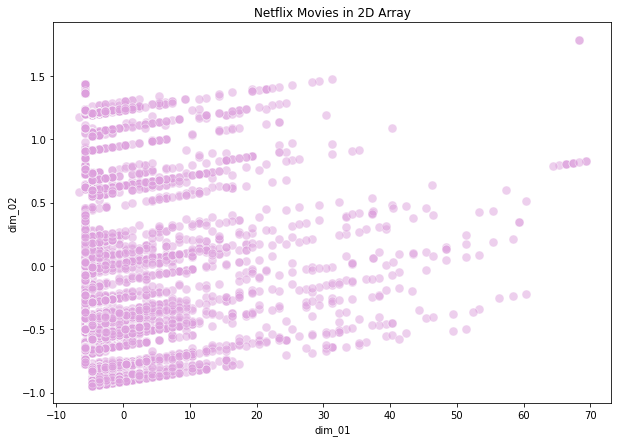

In [ ]:
#visualising 2D array data
plt.figure(figsize=(10,7))
sns.scatterplot(x='dim_01', y='dim_02', data=X_movies, alpha=.5, color='plum', s=80)
plt.title("Netflix Movies in 2D Array")

In [ ]:
#PCA on TV shows dataframe
pca = PCA(n_components=2)
X_tv = pca.fit_transform(df_tv)
X_tv = pd.DataFrame(X_tv, columns=['dim_01', 'dim_02'])

Text(0.5, 1.0, 'Netflix TV Shows in 2D Array')

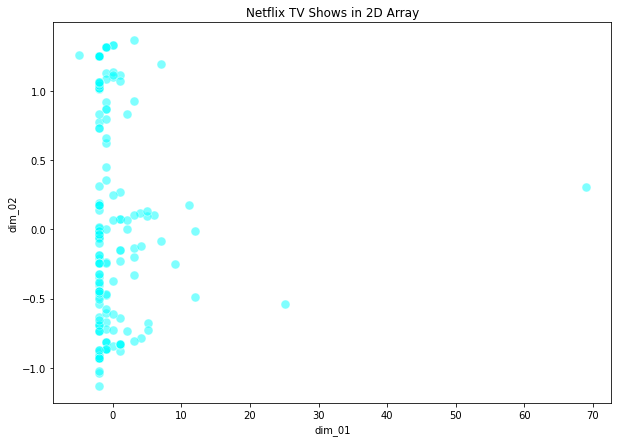

In [ ]:
#visualising 2D array data
plt.figure(figsize=(10,7))
sns.scatterplot(x='dim_01', y='dim_02', data=X_tv, alpha=.5, color='cyan', s=80)
plt.title("Netflix TV Shows in 2D Array")

In [ ]:
#PCA on both movies and TV Shows dataframe
pca = PCA(n_components=2)
X = pca.fit_transform( df_new.drop(drop_cols, axis=1))
X = pd.DataFrame(X, columns=['dim_01', 'dim_02'])

# Clustering of Data

K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7967445091683506
For n_clusters = 3 The average silhouette_score is : 0.7211450864309327
For n_clusters = 4 The average silhouette_score is : 0.6941973569972131
For n_clusters = 5 The average silhouette_score is : 0.6820107017566107
For n_clusters = 6 The average silhouette_score is : 0.6190910305200903
For n_clusters = 7 The average silhouette_score is : 0.5796102431170737


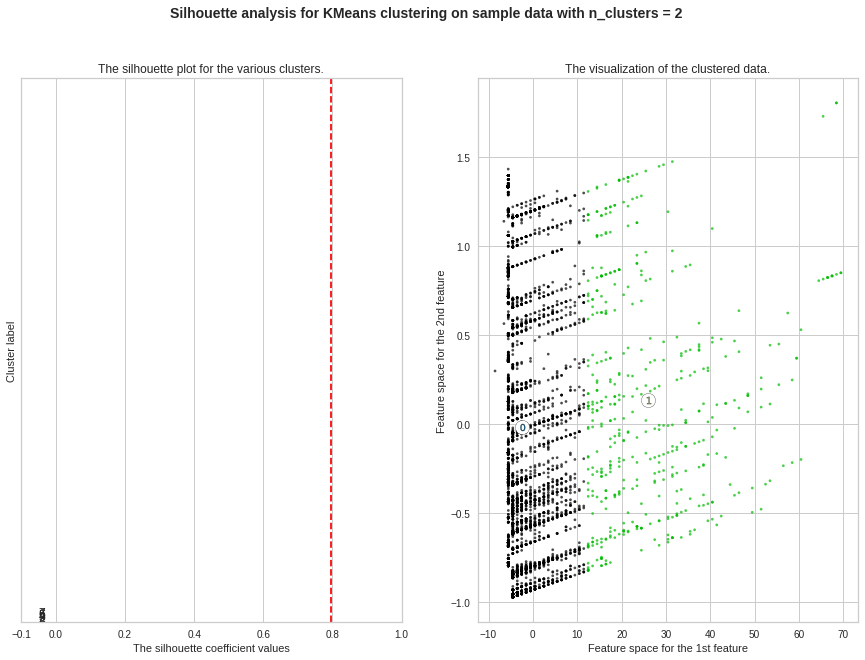

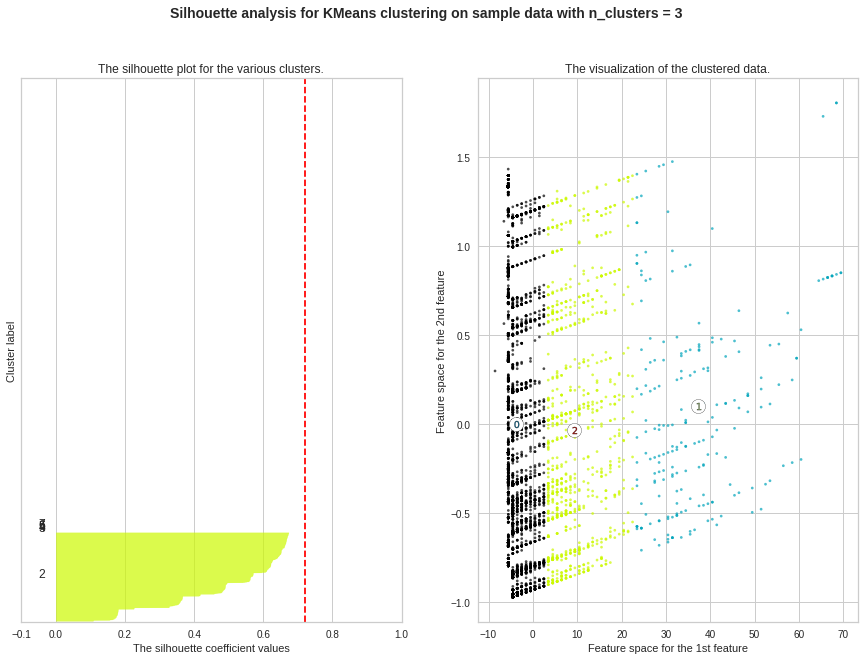

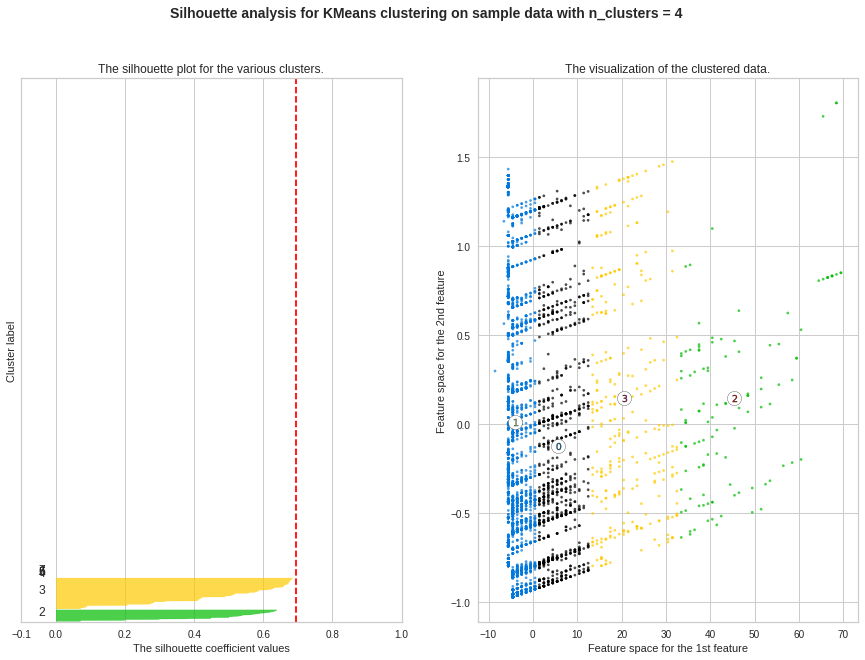

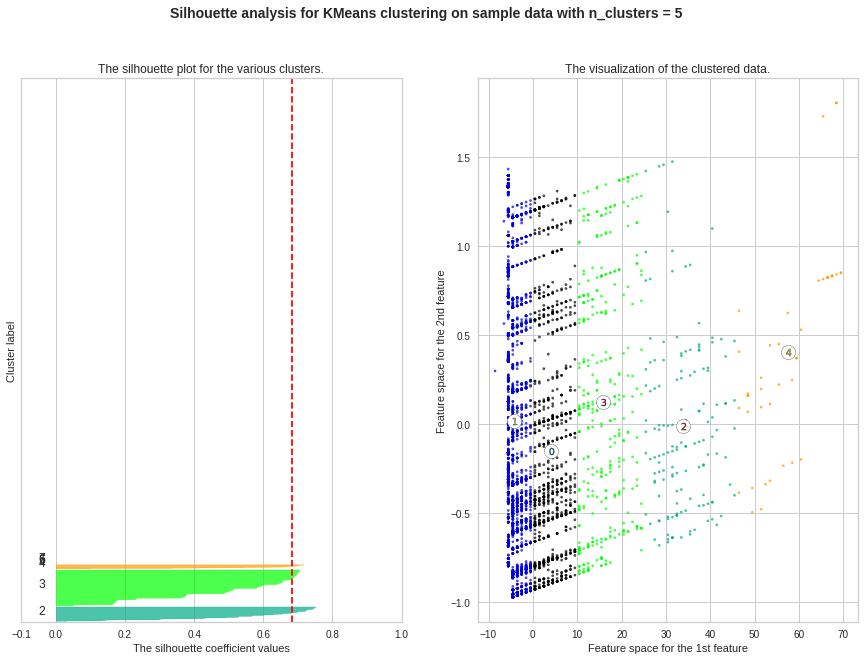

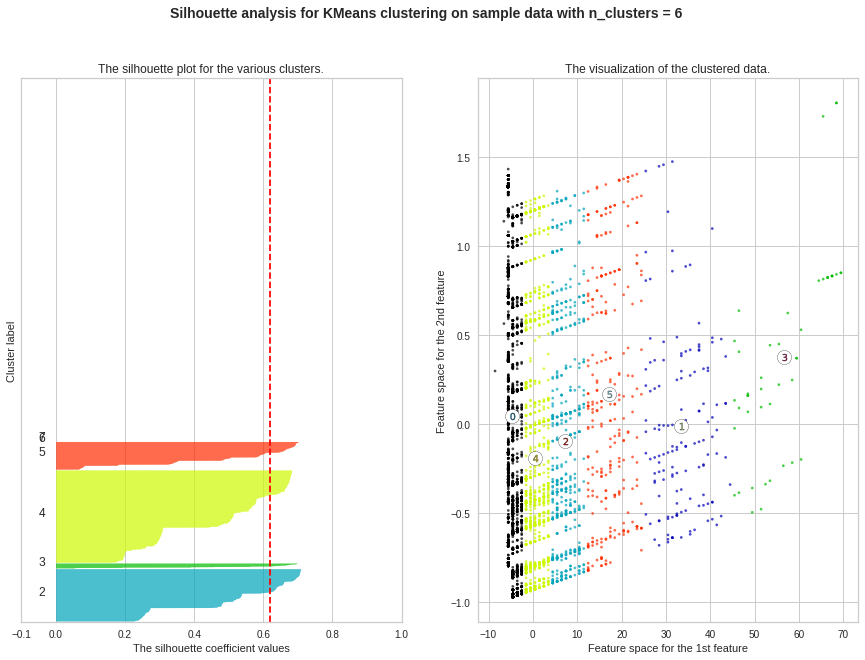

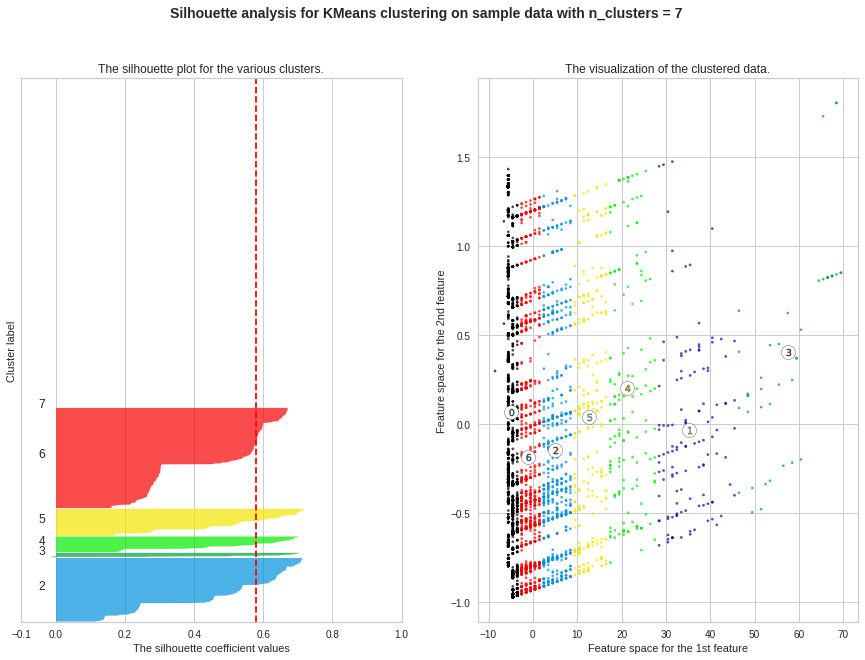

In [ ]:
range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range_n_clusters:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)
 # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['dim_01'], X['dim_02'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters, fontsize=14,fontweight="bold", )

plt.show()

As we can see, we get the best result when the number of cluster is 3
but I am not satisfied with the visualisation of Silhouette analysis so I am trying a different method, this time using Silhouette visualizer

For n_clusters = 2 The average silhouette_score is : 0.7929062271813934


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


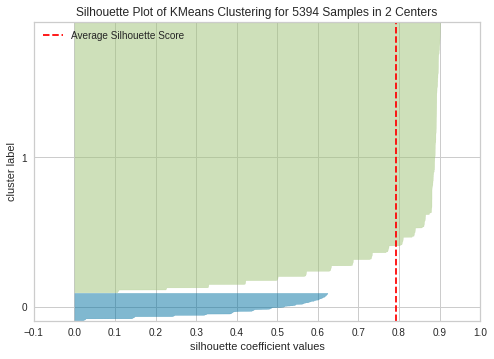

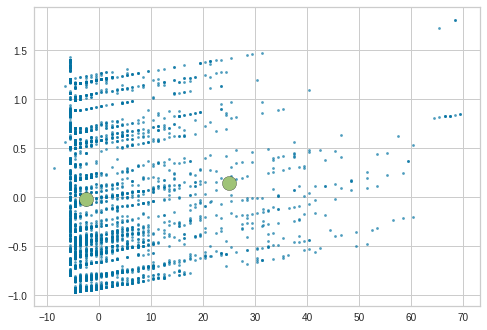

For n_clusters = 3 The average silhouette_score is : 0.7230804074250236


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


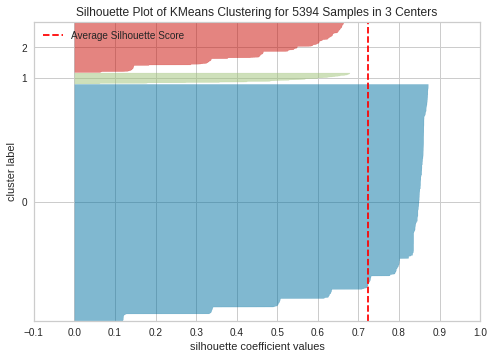

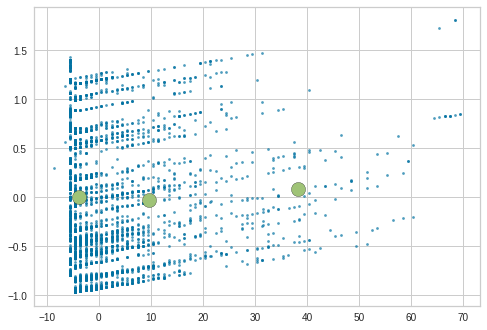

For n_clusters = 4 The average silhouette_score is : 0.6839984862781869


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


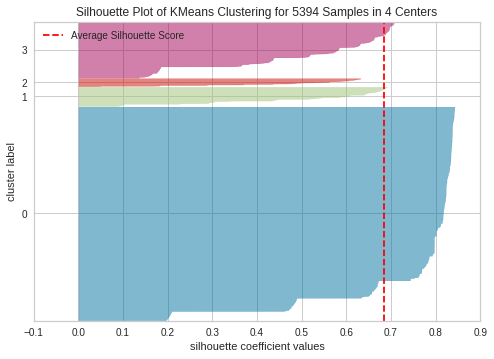

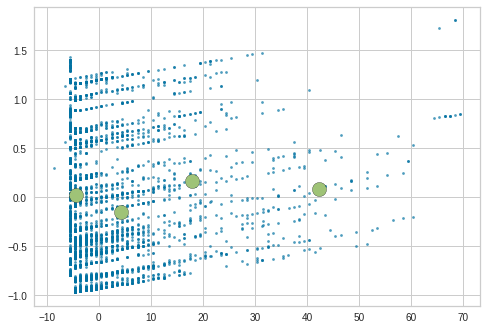

For n_clusters = 5 The average silhouette_score is : 0.6818977969748488


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


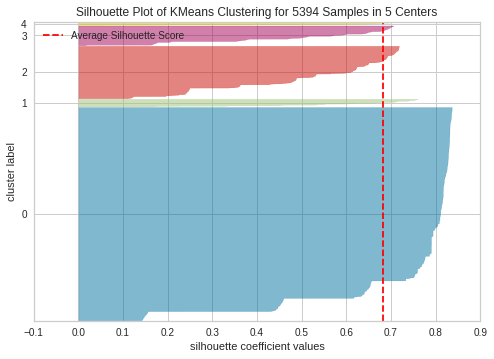

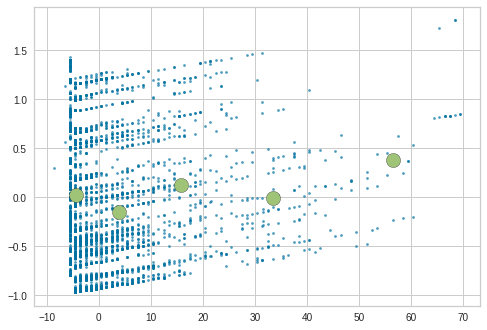

For n_clusters = 6 The average silhouette_score is : 0.6198255264409562


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


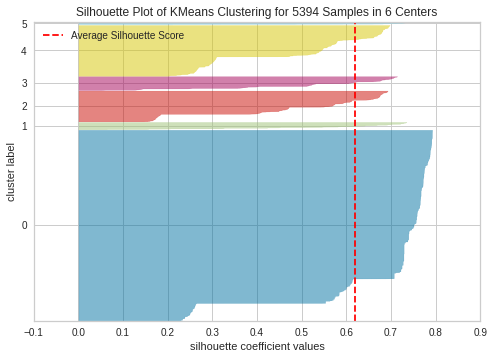

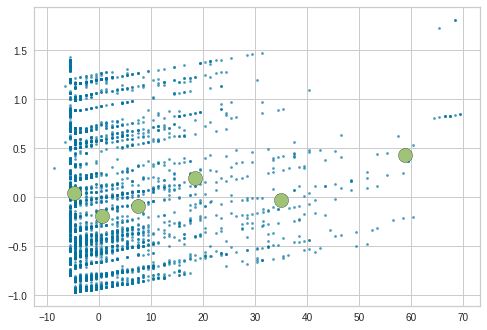

For n_clusters = 7 The average silhouette_score is : 0.5667089989388799


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


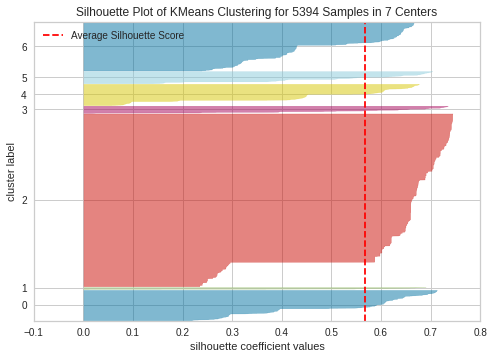

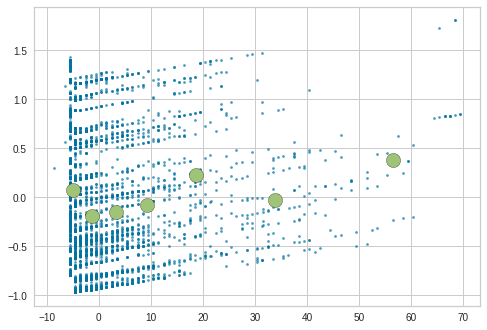

In [ ]:
n_clusters= range(2,8)
for i in n_clusters:
 kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
 y_predict= kmeans.fit_predict(X)
 silhouette_avg = silhouette_score(X, y_predict)
 print("For n_clusters =",i,"The average silhouette_score is :",silhouette_avg,)
 visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
 visualizer.fit(X)        # Fit the data to the visualizer
 visualizer.show()        # Finalize and render the figure
 
 plt.scatter(X['dim_01'], X['dim_02'], marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")
 centers = kmeans.cluster_centers_
# Draw circles at cluster centers
 plt.scatter(centers[:, 0],centers[:, 1],marker="o",alpha=1,s=200,edgecolor="k",)
 
 plt.legend()
 plt.show()

Now, the visualisation is somewhat better, again the optimum number of cluster as suggested by the Silhouette analysis is 3

**Elbow method**

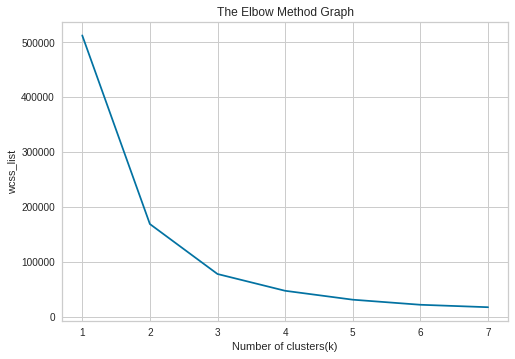

In [ ]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 8):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1,8), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

This method is also suggesting the optimum number of clusters as 3 

Hierarchial Clustering

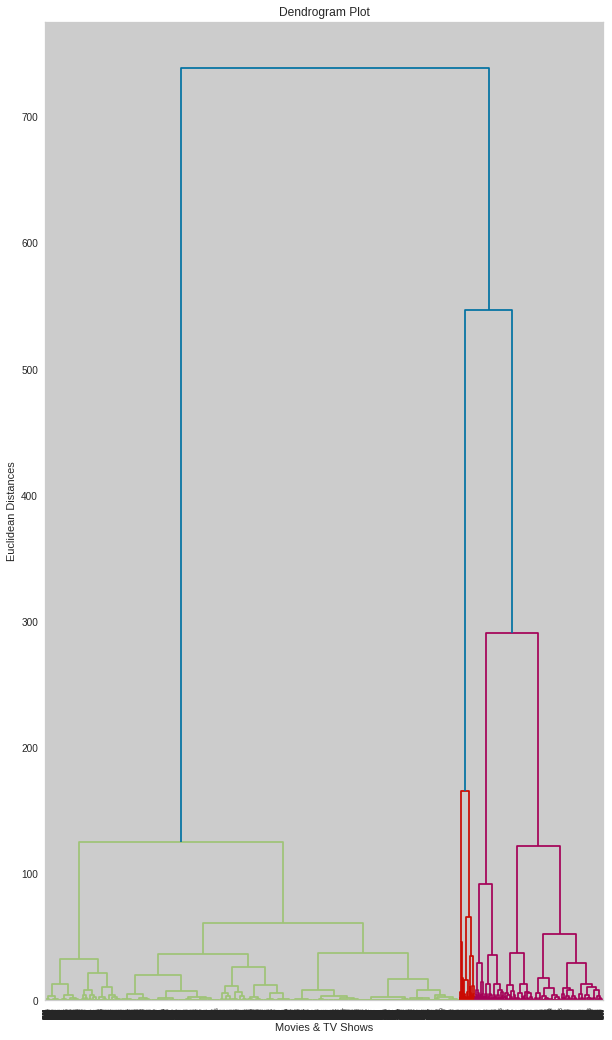

In [ ]:
import scipy.cluster.hierarchy as shc  
plt.figure(figsize=(10,18))
dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Movies & TV Shows")  
plt.show()  

Again, we are getting the number of clusters as 3.
So, all the methods are suggesting 3 clusters for best results.





# Recommendation System

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df['description'] = df['description'].fillna('')
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')



In [ ]:
programme_list=df['title'].to_list()

In [ ]:
#select programme type,country,genres,director & description
#join all the info together
#convert all words into lowercase so that algorithm will not distinguish as independent words
def bag_of_words(df):
    features = df['title']+' '+df['type']+' '+df['country']+' '+df['listed_in']+' '+df['director']+' '+df['cast']+' '+df['description']
    return features.fillna('').str.lower()

features = bag_of_words(df)
     

tfidf_matrix = tfidf.fit_transform(features)                
tfidf_matrix.shape

(7787, 38558)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[0:10] 
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Indiana Jones and the Last Crusade,1.0000
1,Indiana Jones and the Raiders of the Lost Ark,0.3656
2,Indiana Jones and the Temple of Doom,0.2785
3,Indiana Jones and the Kingdom of the Crystal S...,0.2731
4,Monty Python and the Holy Grail,0.1745
5,The River Wild,0.1072
6,A Bridge Too Far,0.1066
7,Patriot Games,0.1060
8,Lincoln,0.0999
9,The Battle of Midway,0.0907


In [ ]:
recommend("Final Destination")

,Recommend programme,Similarity(0-1)
0,Final Destination,1.0000
1,Rodney King,0.1727
2,Final Destination 3,0.1219
3,Final Destination 2,0.1209
4,The Final Destination,0.1167
5,Ali Wong: Baby Cobra,0.1128
6,Ali Wong: Hard Knock Wife,0.1112
7,Jay and Silent Bob Strike Back,0.1062
8,I Am the Pretty Thing That Lives in the House,0.0921
9,Walking Out,0.0897


In [ ]:
recommend('Avengers: Infinity War')

,Recommend programme,Similarity(0-1)
0,Avengers: Infinity War,1.0000
1,Thor: Ragnarok,0.1726
2,Black Panther,0.1140
3,Her,0.1129
4,War Horse,0.1090
5,The Little Prince,0.0976
6,Chris Brown: Welcome to My Life,0.0937
7,Chef,0.0924
8,Legion,0.0866
9,Star Wars: Episode VIII: The Last Jedi,0.0841


In [ ]:
recommend("Dragons: Dawn of the Dragon Racers")

,Recommend programme,Similarity(0-1)
0,Dragons: Dawn of the Dragon Racers,1.0000
1,How to Train Your Dragon 2,0.3528
2,Dragons: Rescue Riders: Hunt for the Golden Dr...,0.1667
3,Dragon Tiger Gate,0.1343
4,ParaNorman,0.1320
5,Dragons: Rescue Riders: Secrets of the Songwing,0.1264
6,Hot Bot,0.1195
7,Trolls Holiday Special,0.0978
8,Superbad,0.0895
9,Kung Fu Panda: Holiday,0.0859


I think the recommendation system is working pretty good.

# Conclusion

It's evident that Netflix has grown over the years by many folds. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US alone and almost 98 million internationally. Netflix's original subscriber base used to be from the United States solely following its IPO. A large part of its success was due to the decision to expand to international markets especially countries like India which is a huge market and has a high purchasing power. We can see the dominance of Indian Actors and Directors as a major chunk of the top Actors and Directors are based in India. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.